# Simple Linear Regression
Analyze tips data from seaborn  
    * Total Bill as Independent Variable  
    * Tips as Dependent Variable  
Analyze the relationship  
Apply Simple Linear Regression  
Perform F Test and T Test  
Interpret the result  
* use α 5%    
 

## Library


In [9]:

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import normaltest

## Dataset: Tips Dataset  

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.  

From This information we frame the problem :  
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?  
1. Data :  
  1. Label : Tips  
  1. Features : Total Bill  
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.  
1. Action : Make food servers allocation   
1. Value : increase of staff morale  

In [4]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## EDA

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
tips[['total_bill','tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [10]:
normaltest(tips['total_bill']) #tidak normal

NormaltestResult(statistic=45.11781912347332, pvalue=1.5951078766352608e-10)

In [11]:
tips[['total_bill','tip']].corr('spearman')  #korelasi moderate

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


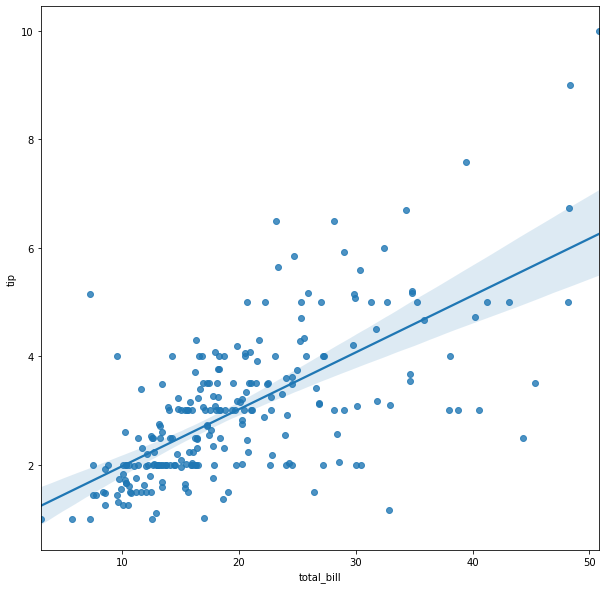

In [13]:
plt.figure(figsize=(10,10))
sns.regplot(x='total_bill',y='tip',data=tips)

## Modelling  

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [14]:
sm_lm= sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill']])) #model
result= sm_lm.fit() #fitting

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           6.69e-34
Time:                        10:14:39   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Interpretation

F test:  
prob(F-stat)<=0.05, ada cukup bukti *total_bill* memiliki pengaruh signifikan terhadap *tip*   

Partial test (t-test):

1. B0: p-value (P>|t|) <= 0.05; tapi B0 nilai *tip* yang diberikan ketika *total_bill* adalah 0. Dalam kasus ini, B0 menjadi tidak relevan, karena tidak mungkin orang makan di restoran dan memiliki *total_bill* = 0  

2. B1: p-value <=0.05, artinya kita punya cukup bukti bahwa *total_bill* memiliki pengaruh signifikan terhadap *tip*  

Parameter estimate (coef):  

1. B0= 0.9203 : Karena intersep tidak relevan dalam kasus ini, maka tidak perlu diinterpretasikan   

2. B1=0.1050 : Ketika *total_bill* meningkat sebesar 1 USD , maka nilai *tip* akan meningkat sebesar 0.1050 USD. Perlu diperhatikan, interpretasi ini direkomendasikan hanya ketika nilai total bill berada di range 3.07 USD dan 50.81 USD  

Coefficient Determination (R-squared) :  

R-Squared= 45.7% : Model yang kita buat mampu menjelaskan 45.7% variasi dari data tip

# Latihan

In [19]:
df= sns.load_dataset('diamonds')

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Coba buat model *simple linear regression* dan intepretasinya untuk memprediksi harga berlian berdasarkan karatnya  
x= carat  
y= price 

In [22]:
df[['carat','price']].describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [23]:
normaltest(df['price'])

NormaltestResult(statistic=15096.649759774145, pvalue=0.0)

In [24]:
df[['carat','price']].corr('spearman')

,carat,price
carat,1.000000,0.962883
price,0.962883,1.000000


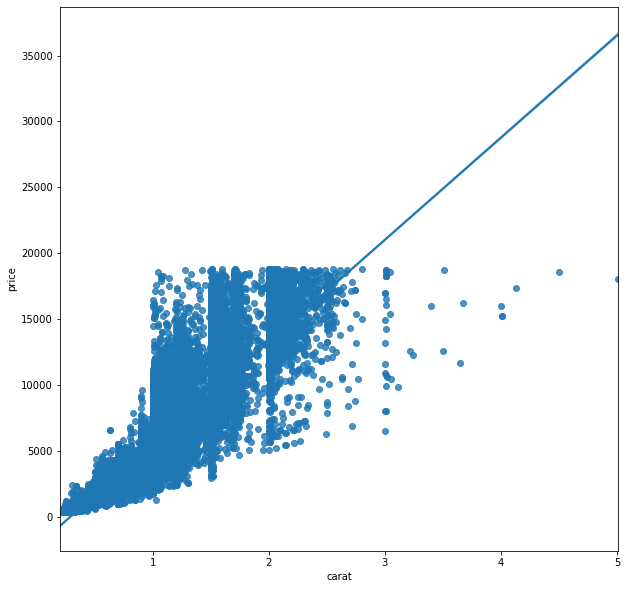

In [25]:
plt.figure(figsize=(10,10))
sns.regplot(x='carat',y='price',data=df)

In [26]:
sm_lm= sm.OLS(df['price'], sm.add_constant(df[['carat']])) #model
result= sm_lm.fit() #fitting

In [27]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:24:44   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

In [29]:
mpg=sns.load_dataset('mpg')

In [32]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


simple linear regression

y= MPG
x= pilih antara: displacement, horsepower, weigth, acceleration; beri alasan untuk pilihan kalian.

missing value di drop 

In [38]:
normaltest(mpg['mpg'])

NormaltestResult(statistic=20.555424899203928, pvalue=3.439111026186637e-05)

In [39]:
mpg[['mpg','displacement', 'horsepower', 'weight', 'acceleration']].corr('spearman')['mpg']

mpg             1.000000
displacement   -0.855692
horsepower     -0.853616
weight         -0.874947
acceleration    0.438677
Name: mpg, dtype: float64

In [41]:
mpg[['mpg','weight']].isna().sum()

mpg       0
weight    0
dtype: int64

In [42]:
mpg[['mpg','weight']].describe()

,mpg,weight
count,398.000000,398.000000
mean,23.514573,2970.424623
std,7.815984,846.841774
min,9.000000,1613.000000
25%,17.500000,2223.750000
50%,23.000000,2803.500000
75%,29.000000,3608.000000
max,46.600000,5140.000000


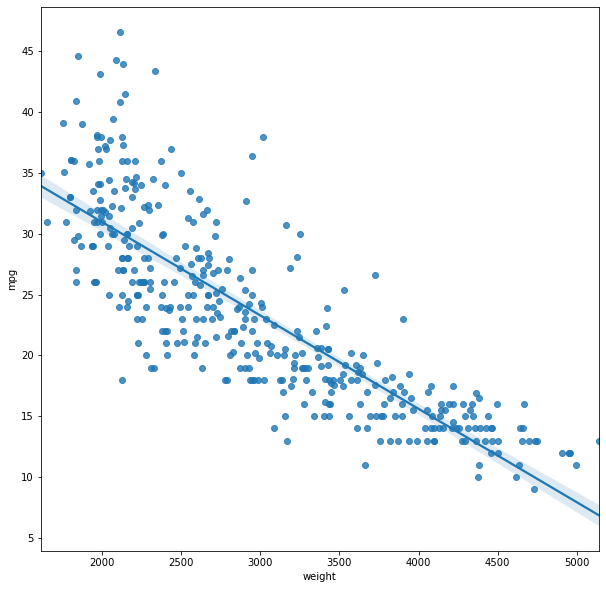

In [44]:
plt.figure(figsize=(10,10))
sns.regplot(x='weight',y='mpg',data=mpg)

In [45]:
sm_lm= sm.OLS(mpg['mpg'], sm.add_constant(mpg[['weight']])) #model
result= sm_lm.fit() #fitting

In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          2.97e-103
Time:                        13:27:29   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

In [48]:
result.f_pvalue

2.9727995640498094e-103